# Temperature Exploratory Data Analysis

### Context

This Exloratory Data Analysis (EDA), aims to extract relevant insights as to how the temperature of each cities affect the different factors that could affect the weather. This EDA aims to identify patterns and correlation between the Temperature of different cities and how it affects other diffrent features such as precipitation.


### Feature Description

- Feature_1:
- Feature_2:

In [34]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
data = pd.read_csv('../task1-collection/open_meteo.csv')
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d')
data.head()

,Unnamed: 0,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,...,0.0,18.3,25.6,54,4.38,24.900002,67.0,8.0,Pakistan,Karachi
1,1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,...,0.0,24.6,35.3,64,3.84,24.900002,67.0,8.0,Pakistan,Karachi
2,2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,...,0.0,16.6,28.1,312,3.69,24.900002,67.0,8.0,Pakistan,Karachi
3,3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,...,0.0,14.0,22.7,353,3.63,24.900002,67.0,8.0,Pakistan,Karachi
4,4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,...,0.0,19.3,29.2,270,3.55,24.900002,67.0,8.0,Pakistan,Karachi


In [38]:
data = data[['time', 'city', 'latitude', 'temperature_2m_min', 'temperature_2m_max', 'temperature_2m_mean', 'precipitation_sum', 'precipitation_hours', 'et0_fao_evapotranspiration']]
data['precipitation_rate'] = data['precipitation_sum'] / data['precipitation_hours']
data['precipitation_rate'].fillna(0, inplace=True)
data.head()

,time,city,latitude,temperature_2m_min,temperature_2m_max,temperature_2m_mean,precipitation_sum,precipitation_hours,et0_fao_evapotranspiration,precipitation_rate
0,2010-01-01,Karachi,24.900002,14.8,26.0,20.9,0.0,0.0,4.38,0.0
1,2010-01-02,Karachi,24.900002,15.6,25.3,20.5,0.0,0.0,3.84,0.0
2,2010-01-03,Karachi,24.900002,14.3,25.0,19.9,0.0,0.0,3.69,0.0
3,2010-01-04,Karachi,24.900002,15.0,25.6,20.4,0.0,0.0,3.63,0.0
4,2010-01-05,Karachi,24.900002,16.3,25.4,20.7,0.0,0.0,3.55,0.0


## Temperature vs. Precipitation Sum

We analyze the relationship between the total precipitation in different cities and their respective current temperatures. Through graphical representation, we gain valuable insights into how variations in temperature influence the accumulated precipitation in each city. This approach allows us to better understand the intricate interplay between temperature and precipitation patterns.

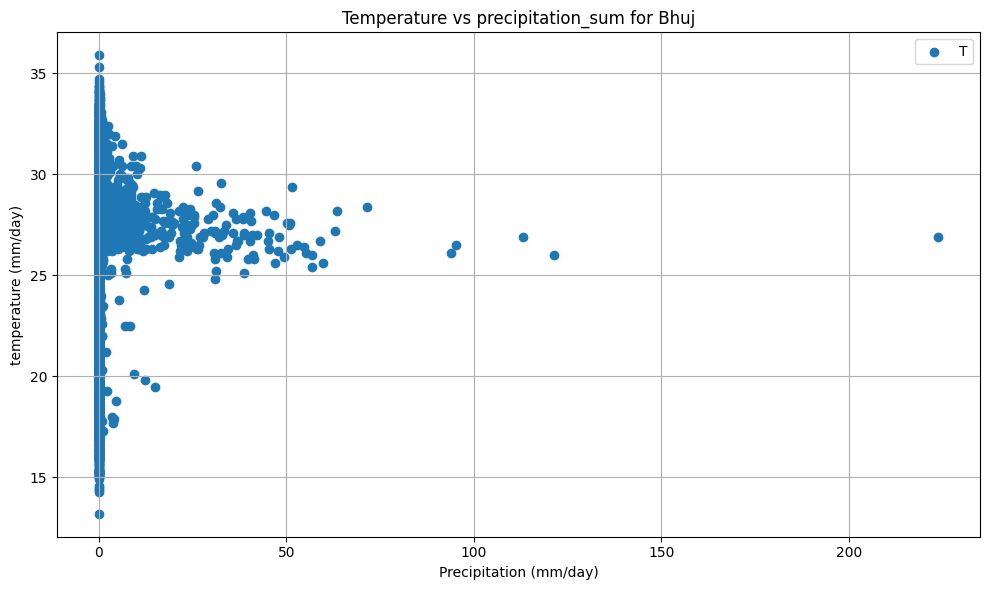

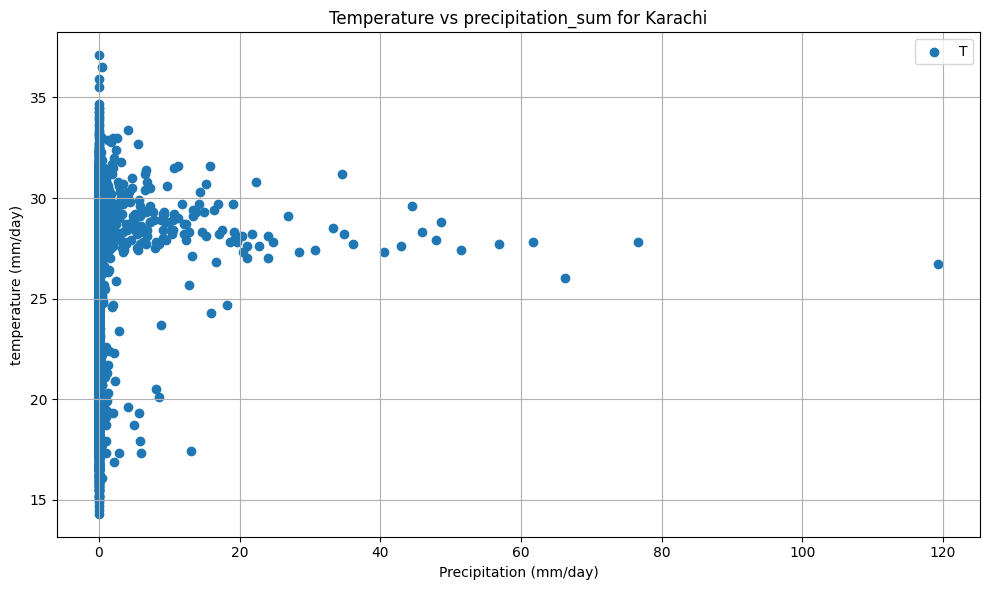

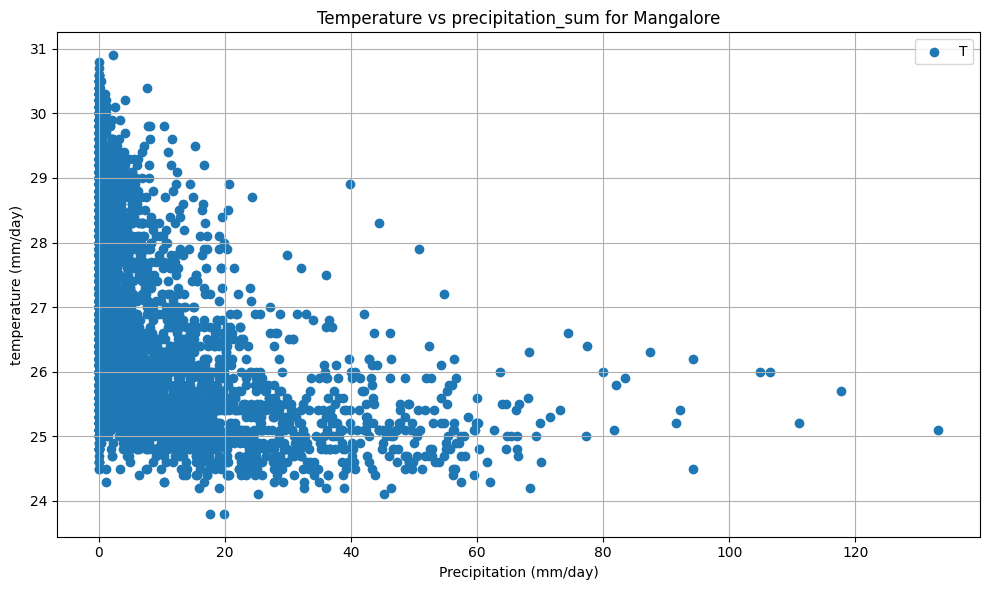

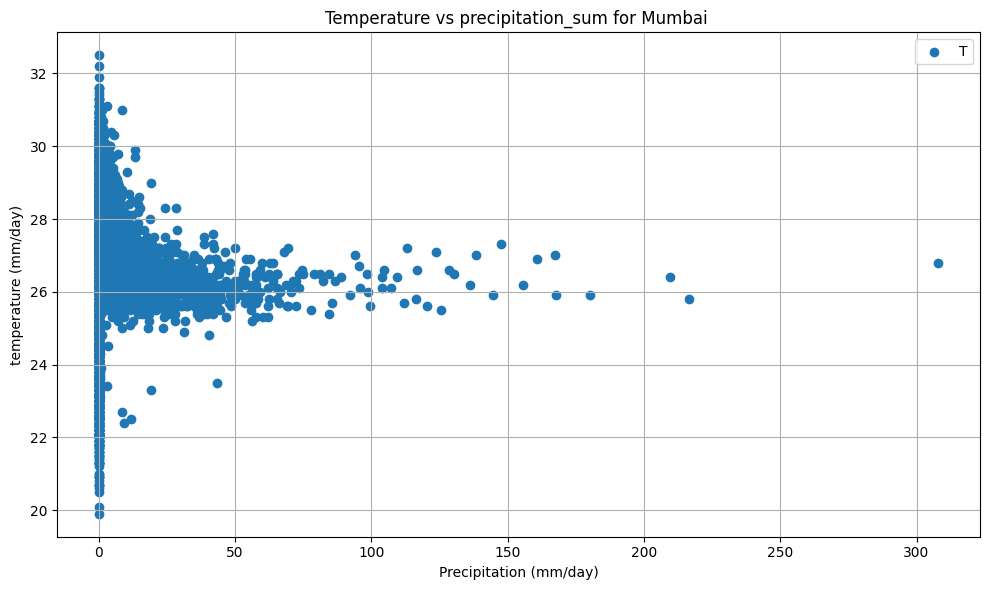

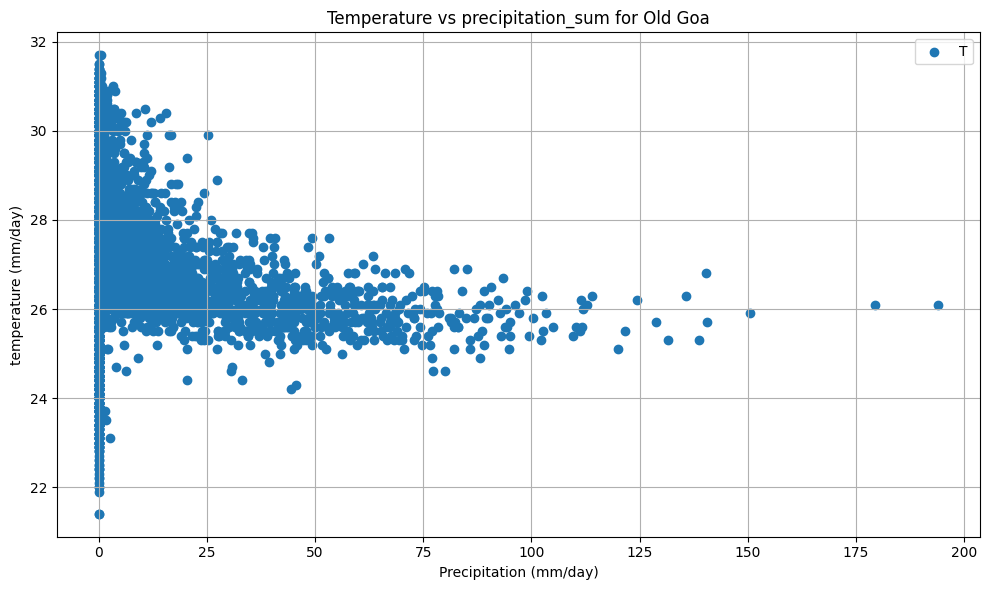

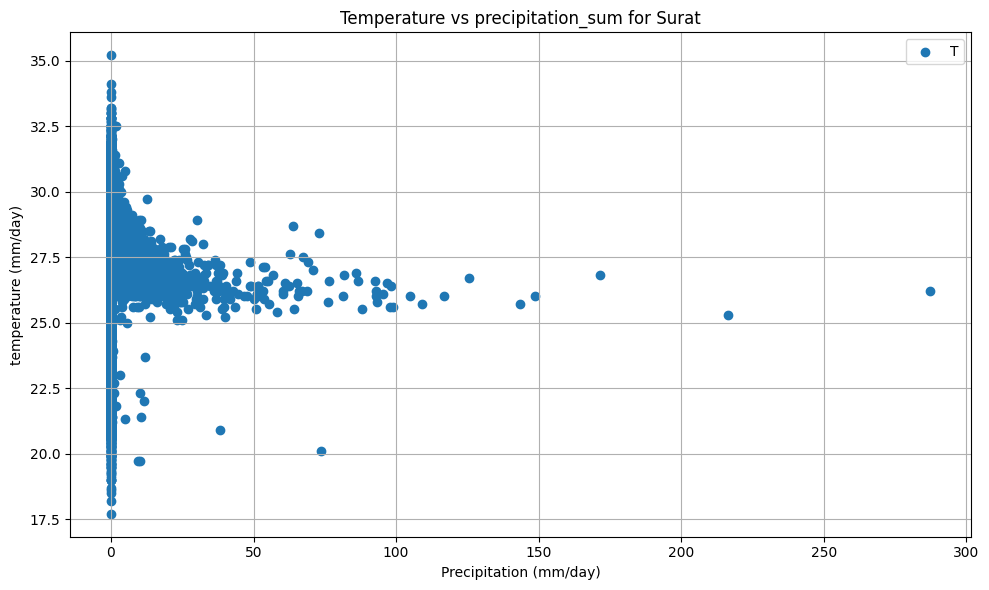

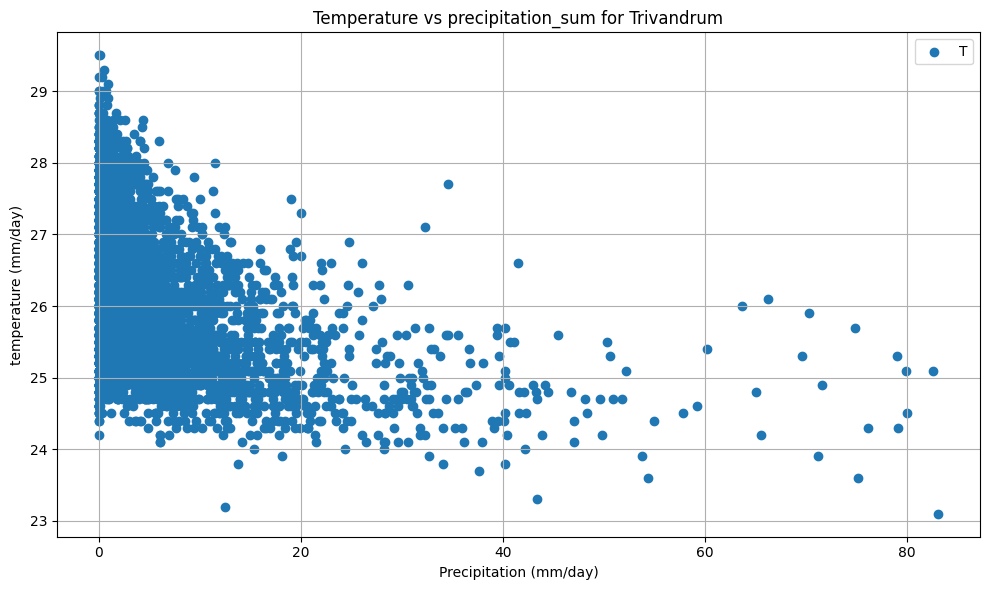

In [39]:
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.scatter(group_data['precipitation_sum'], group_data['temperature_2m_mean'], label=city)

    plt.title('Temperature vs precipitation_sum for %s' % city )
    plt.xlabel('Precipitation (mm/day)')
    plt.ylabel('temperature (mm/day)')
    plt.legend('Temperature vs precipitation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Conclusion

## Temperature Over Time

We will examining the temporal temperature variations across various cities. We aim to discern potential distinctions in temperature patterns between the year 2010 and more recent times. Additionally, we will conduct a detailed analysis of the intra-year temperature fluctuations in specific cities, shedding light on the seasonal changes they experience.

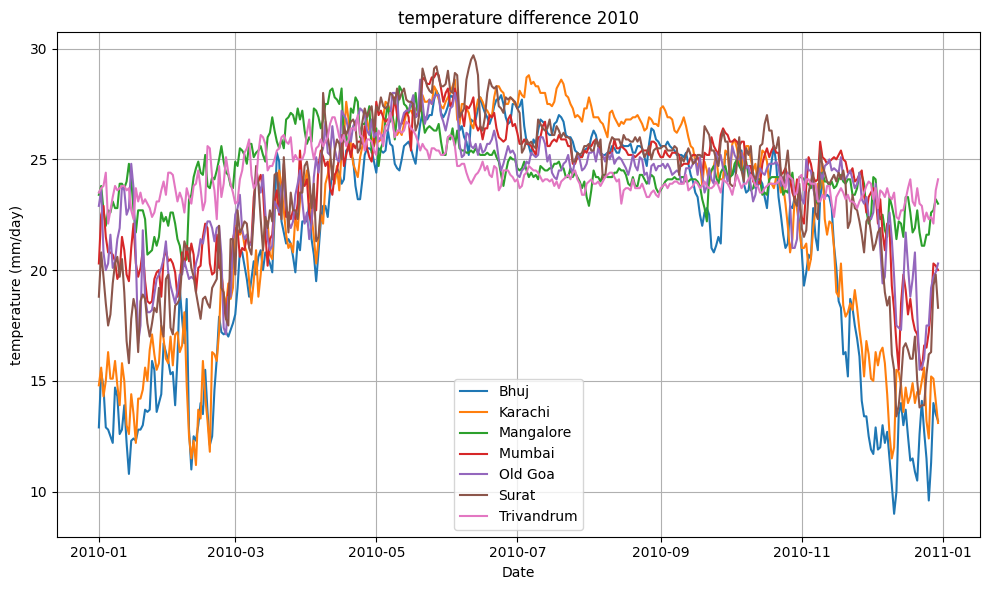

In [58]:
start_date = '2010-01-01'
end_date = '2010-12-30'
filtered_df = data[(data['time'] >= start_date) & (data['time'] <= end_date)]
plt.figure(figsize=(10, 6))
for city, group_data in filtered_df.groupby('city'):
    plt.plot(group_data['time'], group_data['temperature_2m_min'], label=city)
plt.title('temperature difference 2010')
plt.xlabel('Date')
plt.ylabel('temperature (mm/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

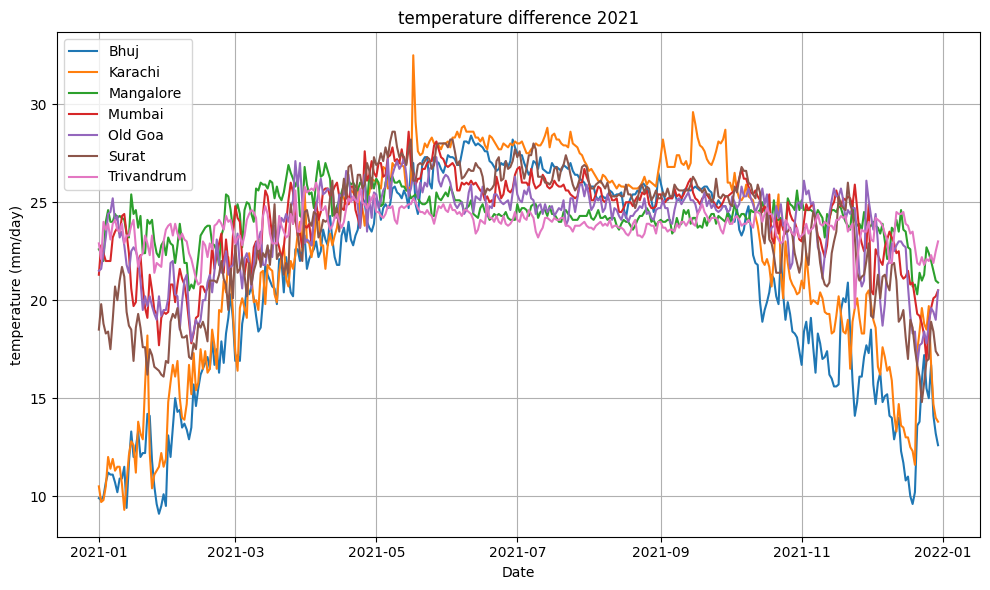

In [57]:
start_date = '2021-01-01'
end_date = '2021-12-30'
filtered_df = data[(data['time'] >= start_date) & (data['time'] <= end_date)]
plt.figure(figsize=(10, 6))
for city, group_data in filtered_df.groupby('city'):
    # curr_city_data = filtered_df[data['city'] == city]
    plt.plot(group_data['time'], group_data['temperature_2m_min'], label=city)
plt.title('temperature difference 2021')
plt.xlabel('Date')
plt.ylabel('temperature (mm/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

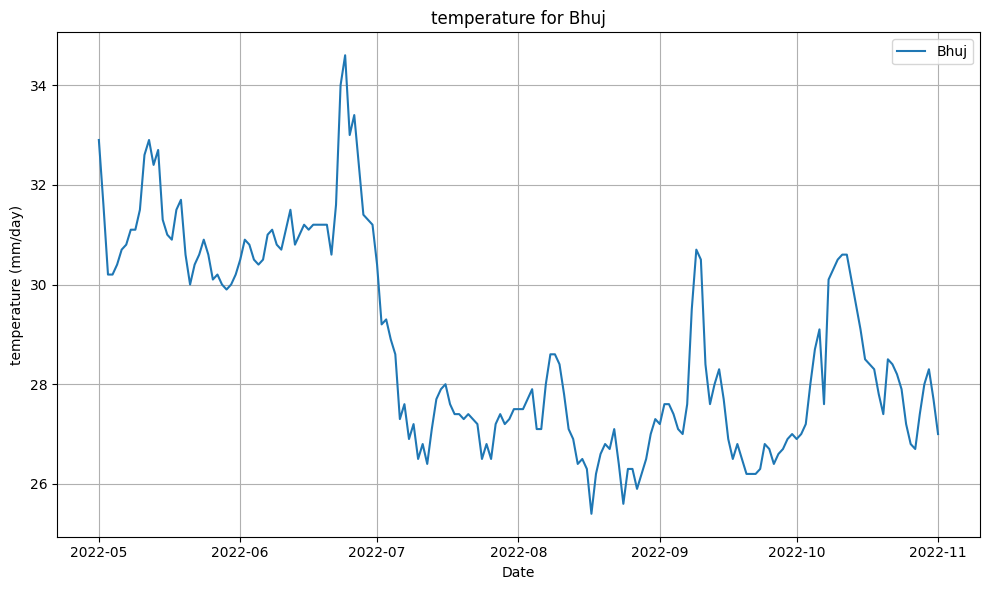

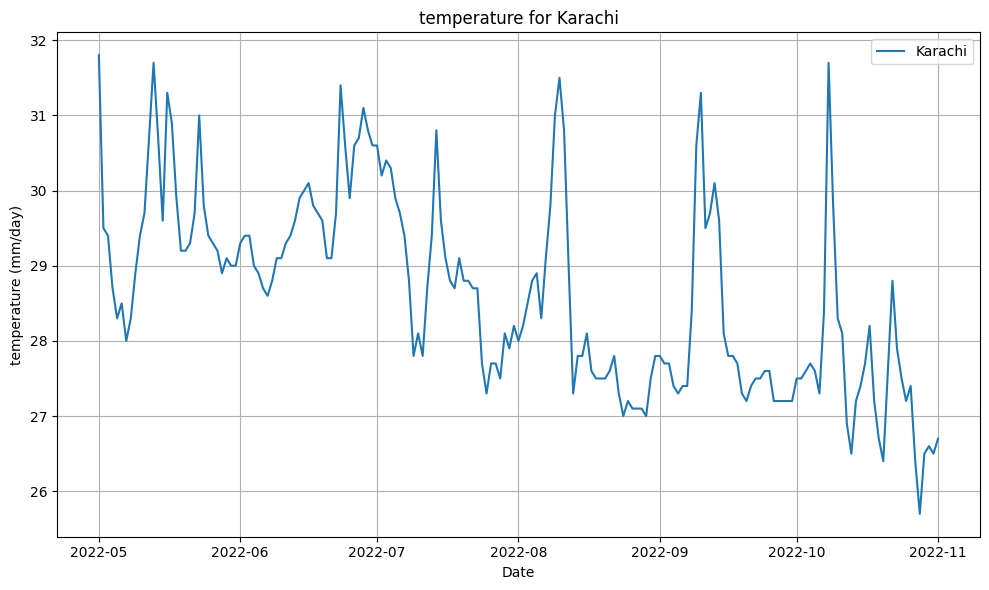

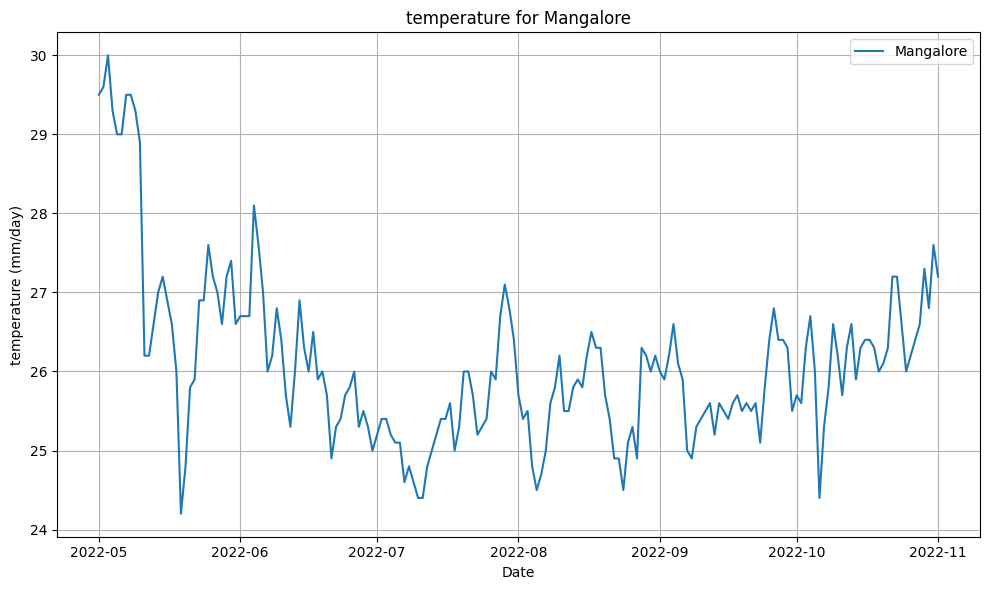

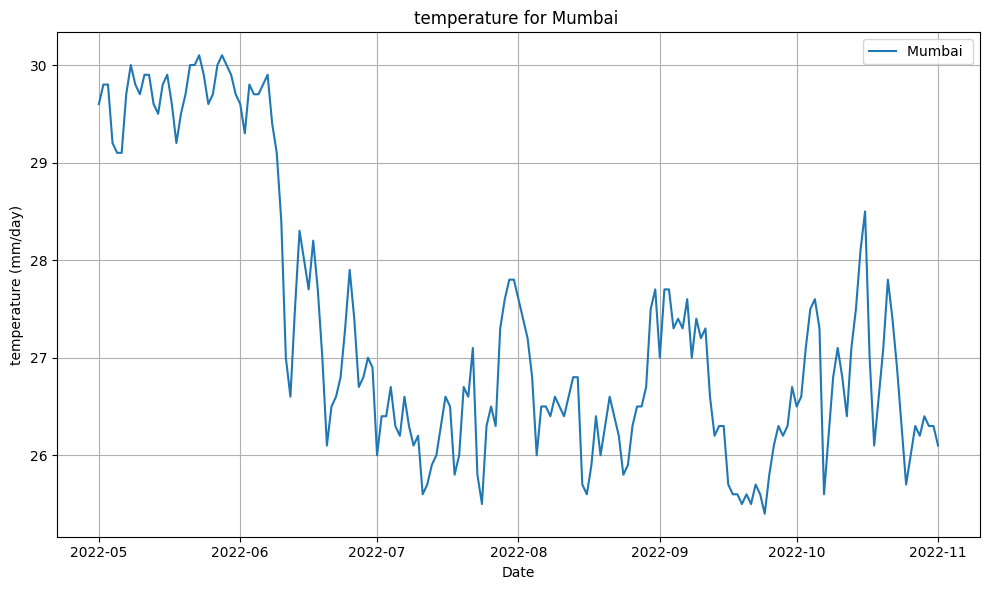

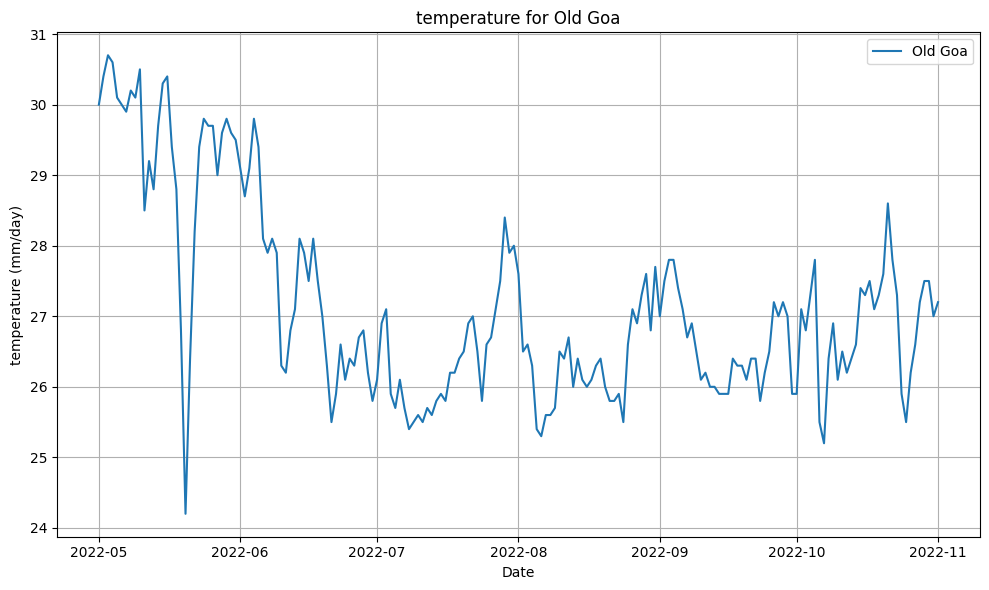

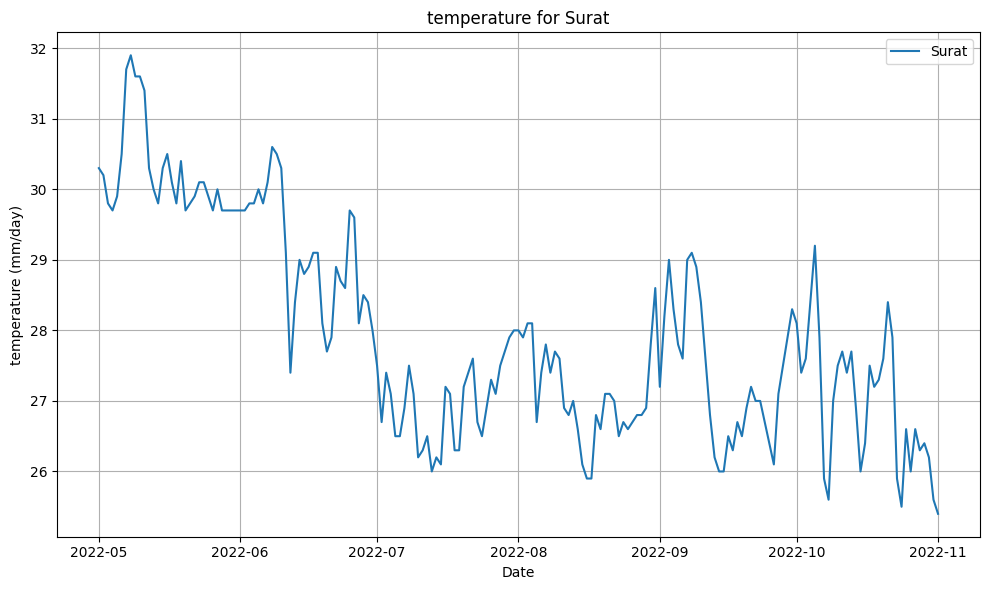

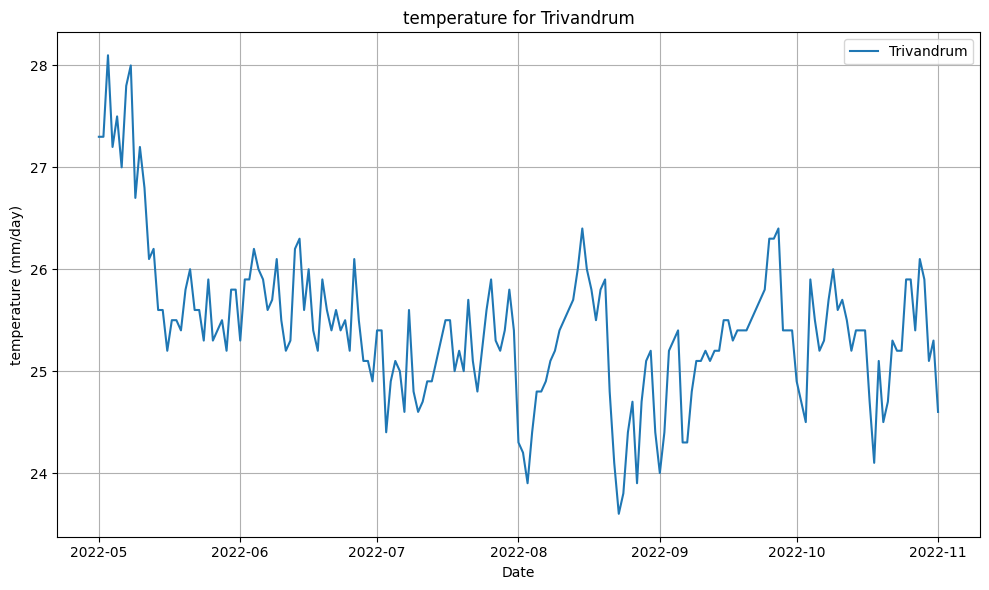

In [61]:
start_date = '2022-05-01'
end_date = '2022-11-1'
filtered_df = data[(data['time'] >= start_date) & (data['time'] <= end_date)]
for city, group_data in filtered_df.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['time'], group_data['temperature_2m_mean'], label=city)
    plt.title('temperature for %s' % city)
    plt.xlabel('Date')
    plt.ylabel('temperature (mm/day)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()